# $$
\text{TP N°4. Résolution approchée des équations différentielles ordinaires.}
$$

Considérons le problème de Cauchy
$$
\begin{cases} \forall t \in \mathbb{R}, \, y'(t) = 10 \big( y(t) - t^2 \big) + 2 t, \\ y(0) = 0, \end{cases} 
$$
et rappelons que l'unique solution de ce problème est donnée par la formule
$$
\forall t \in \mathbb{R}, \, y_0(t) = t^2.
$$

1. Définir la fonction _Carree_ qui prend en entrée un nombre $t$ et renvoie la valeur $y_0(t) = t^2$, puis tracer son graphe sur le segment $[0, 1]$.

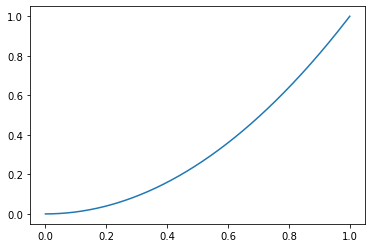

In [1]:
from math import *
from matplotlib.pyplot import *

def Carree(t):
    return t**2

# Tracé du graphe de la fonction carrée

N = 1000
h = 1/N
T = []
Y0 = []
for n in range(0,N + 1):
    T.append(n*h)
    Y0.append(Carree(n*h))
plot(T, Y0)
show()

2. Étant donné un entier $N \geq 1$, nous notons dans toute la suite $h = 1/N$.

a. Définir une fonction _EulerExp_ qui prend en entrée un nombre $N \geq 1$, et renvoie la liste des valeurs approchées $(y_n)_{0 \leq n \leq N}$ de la solution aux temps $(t_n = n \, h)_{0 \leq n \leq N}$, qui sont données par la méthode d'Euler explicite :
$$
y_0 = 0, \quad \text{ et } \quad \forall 0 \leq n \leq N - 1, \, y_{n + 1} = (1 + 10 h) y_n + 2 n h^2 (1 - 5 n h).
$$

In [2]:
def EulerExp(N):
    Y = [0]
    for n in range(0, N):
        Y.append((1 + 10/N)*Y[- 1] + 2*n*(1 - 5*n/N)/N**2)
    return Y

# Test de la correspondance avec l'erreur théorique pour n = N

print("Différence des erreurs numérique et théorique =",1 - EulerExp(N)[N] - ((1 + 10/N)**N -1)/(10*N),"\n")

Différence des erreurs numérique et théorique = -3.6992631180510216e-13 



b. Tracer sur la même figure que celle de la question 1., la solution approchée $(y_n)_{0 \leq n \leq 100}$ obtenue par la fonction ${\it EulerExp}(1 \, 000)$.

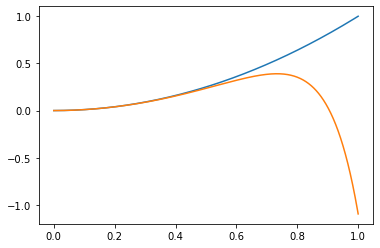

In [3]:
Ye = EulerExp(N)
plot(T, Y0)
plot(T, Ye)
show()

c. Définir une fonction _ErrMaxExp_ qui prend en entrée un nombre $N \geq 1$, et renvoie l'erreur maximale
$$
E_e(N) = \max_{0 \leq n \leq N} |y_0(t_n) - y_n|,
$$
entre la solution exacte et celle obtenue par la méthode d'Euler explicite, puis tracer la courbe représentative de la fonction inverse $N \mapsto 1/E_e(N)$ pour $20 \leq N \leq 1 \, 000$.

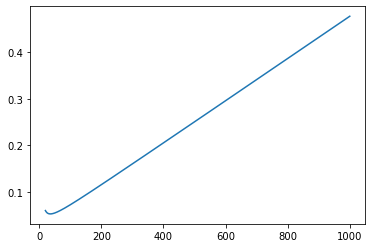

In [4]:
def ErrMaxExp(N):
    e = 0
    Y = EulerExp(N)
    for n in range(0, N + 1):
        e = max(e, abs(n**2/N**2 - Y[n]))
    return e

# Tracé du graphe de l'inverse de l'erreur due à la methode d'Euler explicite

L = []
LEe = []
for n in range(20,N + 1):
    L.append(n)
    LEe.append(1/ErrMaxExp(n))
plot(L, LEe)
show()

3.a. Définir une fonction _EulerImp_ qui prend en entrée un nombre $N \geq 11$, et renvoie la liste des valeurs approchées de la solution $(z_n)_{0 \leq n \leq N}$ aux temps $(t_n)_{0 \leq n \leq N}$, qui sont données par la méthode d'Euler implicite :
$$
z_0 = 0, \quad \text{ et } \quad \forall 0 \leq n \leq N - 1, \, z_{n + 1} = z_n + 10 h z_{n + 1} + 2 (n + 1) h^2 (1 - 5 (n + 1) h).
$$

In [5]:
def EulerImp(N):
    Z = [0]
    for n in range(0,N):
        Z.append((Z[- 1] + 2*(n + 1)*(1 - 5*(n + 1)/N)/N**2)/(1 - 10/N))
    return Z

b. Tracer sur la même figure que celle de la question 1. la solution approchée obtenue par la fonction ${\it EulerImp}(1 \, 000)$.

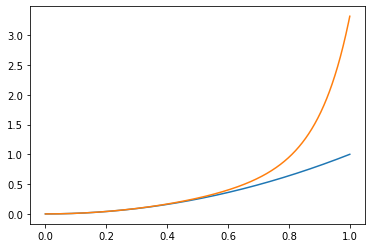

In [6]:
Yi = EulerImp(N)
plot(T, Y0)
plot(T, Yi)
show()

c. Définir une fonction _ErrMaxImp_ qui prend en entrée un nombre $N \geq 1$, et renvoie l'erreur maximale
$$
E_i(N) = \max_{0 \leq n \leq N} |y_0(t_n) - z_n|,
$$
entre la solution exacte et celle obtenue par la méthode d'Euler implicite, puis tracer la courbe représentative de la fonction inverse $N \mapsto 1/E_i(N)$ pour $20 \leq N \leq 1 \, 000$ sur la même figure que celle de la question 2.c.

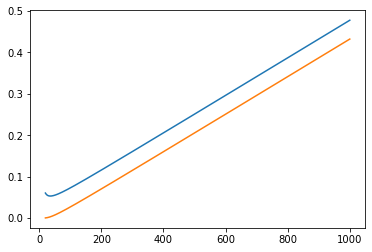

In [7]:
def ErrMaxImp(N):
    e = 0
    Z = EulerImp(N)
    for n in range(0, N+1):
        e = max(e, abs(n**2/N**2 - Z[n]))
    return e

# Tracé du graphe de l'inverse de l'erreur due aux méthodes d'Euler explicite et implicite

LEi = []
for n in range(20,N + 1):
    LEi.append(1/ErrMaxImp(n))
plot(L, LEe)
plot(L, LEi)
show()